<a href="https://colab.research.google.com/github/rachittayal123/AI-in-healthcare/blob/main/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RACHIT TAYAL  E22CSEU0118

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
pip install pandas numpy matplotlib seaborn


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Display first 10 rows
print(df.head(10))


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [ ]:
cols = ["Glucose", "BloodPressure", "BMI"]

for col in cols:
    print(f"{col} Mean   :", df[col].mean())
    print(f"{col} Median :", df[col].median())
    print(f"{col} Mode   :", df[col].mode()[0])  # Mode may return multiple values; take the first
    print()


Glucose Mean   : 120.89453125
Glucose Median : 117.0
Glucose Mode   : 99

BloodPressure Mean   : 69.10546875
BloodPressure Median : 72.0
BloodPressure Mode   : 70

BMI Mean   : 31.992578124999998
BMI Median : 32.0
BMI Mode   : 32.0



In [ ]:
import numpy as np

for col in cols:
    var = df[col].var()
    std = df[col].std()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    print(f"{col} Variance :", var)
    print(f"{col} Std Dev  :", std)
    print(f"{col} IQR      :", iqr)
    print()


Glucose Variance : 1022.2483142519557
Glucose Std Dev  : 31.97261819513622
Glucose IQR      : 41.25

BloodPressure Variance : 374.6472712271838
BloodPressure Std Dev  : 19.355807170644777
BloodPressure IQR      : 18.0

BMI Variance : 62.15998395738257
BMI Std Dev  : 7.8841603203754405
BMI IQR      : 9.3



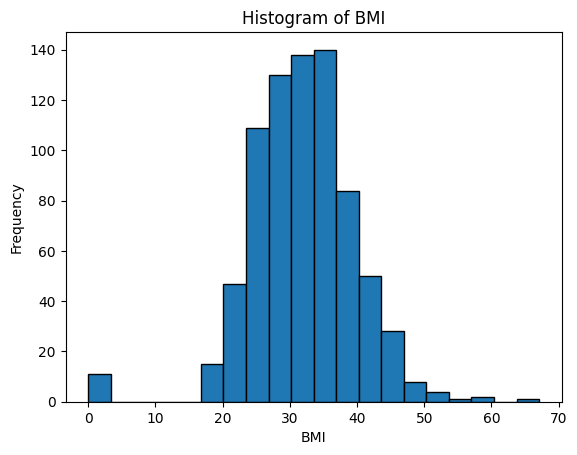

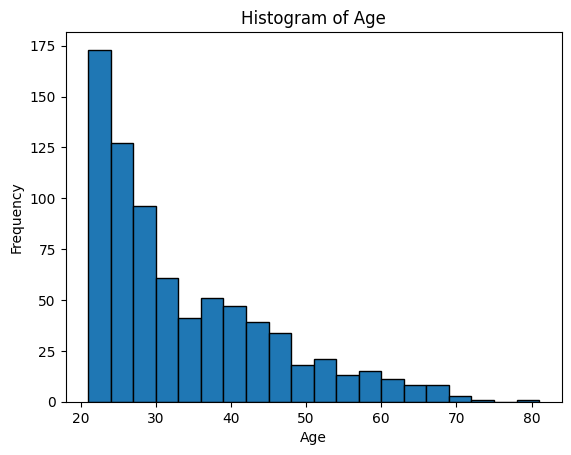

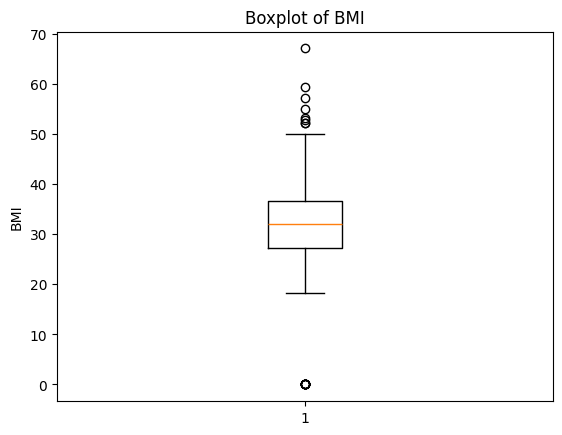

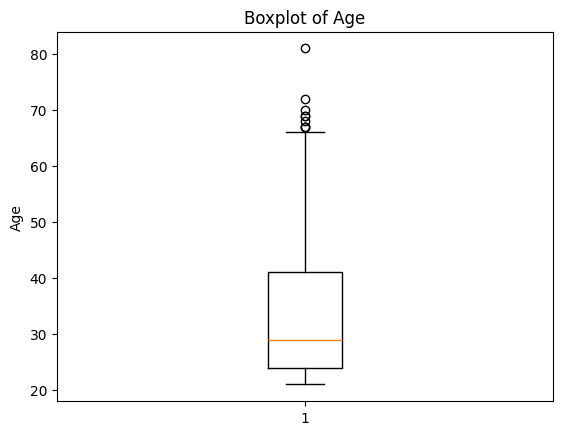

In [ ]:
import matplotlib.pyplot as plt

# Histogram - BMI
plt.hist(df["BMI"], bins=20, edgecolor="black")
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# Histogram - Age
plt.hist(df["Age"], bins=20, edgecolor="black")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Boxplot - BMI
plt.boxplot(df["BMI"].dropna())
plt.title("Boxplot of BMI")
plt.ylabel("BMI")
plt.show()

# Boxplot - Age
plt.boxplot(df["Age"].dropna())
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()


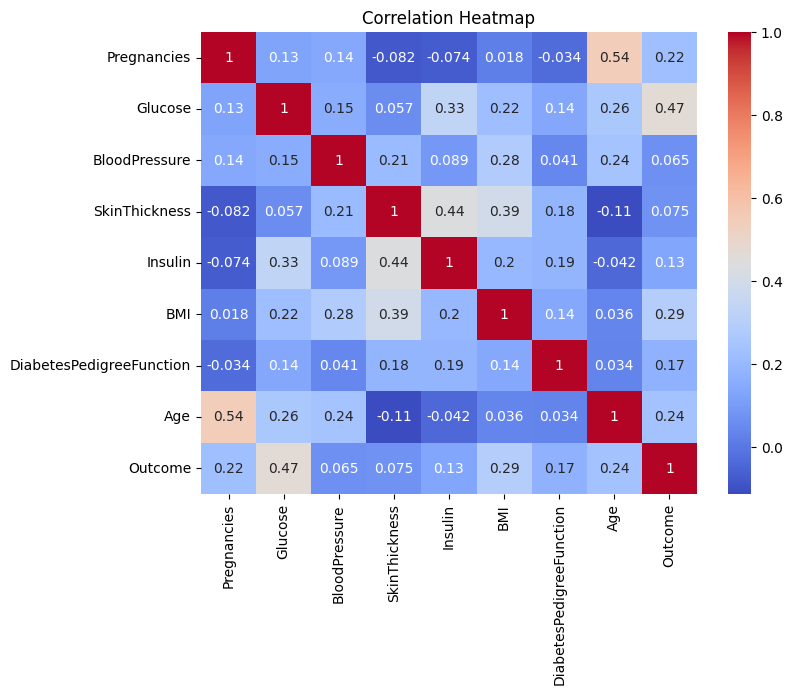

In [ ]:
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
summary_df = df[cols].agg(['mean', 'median', 'var', 'std',
                           lambda x: x.quantile(0.25),
                           lambda x: x.quantile(0.75)])
summary_df.index = ['Mean', 'Median', 'Variance', 'Std Dev', 'Q1', 'Q3']
summary_df.loc['IQR'] = summary_df.loc['Q3'] - summary_df.loc['Q1']
print(summary_df)


              Glucose  BloodPressure        BMI
Mean       120.894531      69.105469  31.992578
Median     117.000000      72.000000  32.000000
Variance  1022.248314     374.647271  62.159984
Std Dev     31.972618      19.355807   7.884160
Q1          99.000000      62.000000  27.300000
Q3         140.250000      80.000000  36.600000
IQR         41.250000      18.000000   9.300000
